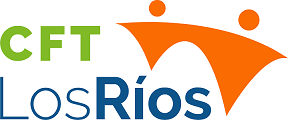

## Unidad 3: Visualización de datos
### Clase 3
### Asignatura: Fundamentos para Data Science
### Profesor: Diego Miranda Olavarría

In [1]:
# Importamos la librería Pandas y la librería Matplotlib

import pandas as pd # Librería para análisis exploratorio
import matplotlib.pyplot as plt # Librería para la visualización de datos
import seaborn as sns # Librería para la visualización de datos

C:\Users\Diego Miranda\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/CodigoMaquina/code/main/datos/personas.csv")
data.head(10)

,altura,peso,ingreso,horas_trabajadas,ausencias
0,134.433878,70.617864,9973.577534,40.905476,4
1,167.158746,109.268295,8961.047249,41.576483,4
2,141.480812,81.034644,7437.977263,41.369239,5
3,123.227119,57.884172,12064.915290,41.537211,3
4,143.554951,93.581093,9296.396167,40.441203,4
5,191.210043,130.460916,11666.087260,41.142484,3
6,179.798862,118.160592,9517.651813,40.653842,4
7,146.724090,74.124337,7529.944441,41.104741,5
8,178.229851,116.055520,11934.461470,41.163304,3
9,160.485605,105.863988,10002.623260,41.992823,4


In [3]:
data.describe()

,altura,peso,ingreso,horas_trabajadas,ausencias
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,149.951455,85.474510,10077.306402,41.275829,3.587000
std,19.748345,21.091609,2490.167110,0.525277,1.264923
min,92.494081,28.431261,1783.853217,39.930111,-1.000000
25%,137.055102,72.812153,8407.200717,40.905475,3.000000
50%,150.338618,84.891180,10072.833245,41.270119,4.000000
75%,162.905948,99.956094,11689.680823,41.638858,4.000000
max,210.607163,154.046500,20032.236920,43.031858,8.000000


In [4]:
data.dtypes

altura              float64
peso                float64
ingreso             float64
horas_trabajadas    float64
ausencias             int64
dtype: object

In [5]:
data.shape

(1000, 5)

## Correlaciones y Mapa de calor
* Un mapa de calor es una representación gráfica de los valores contenidos en una matriz mediante el uso de colores. En estos, los índices de la matriz representan las variables de dos características que se desean comparar, es decir, detectar la correlación entre estas dos variables.

In [6]:
correl = data.corr() # Muestra la Correlación
print(correl)

                    altura      peso   ingreso  horas_trabajadas  ausencias
altura            1.000000  0.930608 -0.025283          0.008547   0.025587
peso              0.930608  1.000000 -0.029852         -0.002483   0.027450
ingreso          -0.025283 -0.029852  1.000000          0.625514  -0.973104
horas_trabajadas  0.008547 -0.002483  0.625514          1.000000  -0.603870
ausencias         0.025587  0.027450 -0.973104         -0.603870   1.000000


<AxesSubplot:>

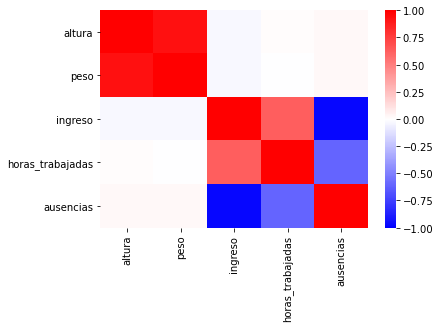

In [7]:
sns.heatmap(correl, cmap="bwr", vmin=-1, vmax=1) 

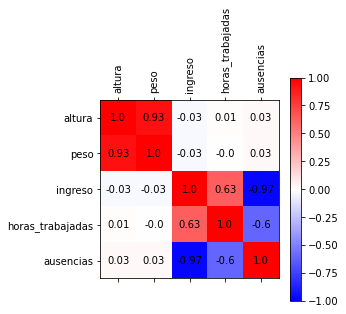

In [8]:
plt.matshow(correl, cmap="bwr", vmin=-1, vmax=1) 
plt.xticks(range(5), correl.columns, rotation=90) 
plt.yticks(range(5), correl.columns)

for i in range(len(correl.columns)): 
    for j in range(len(correl.columns)):
        plt.text(i, j, round(correl.iloc[i, j], 2),
                 ha="center", va="center")


plt.colorbar() 
plt.show()

## Gráfico de torta o pie

* Les enseñaré una técnica usando CountOff, de esta manera podrán elegir valores personalizados de las filas del dataframe

In [9]:
df = pd.read_csv("medals.csv")
df.head(10)

,Unnamed: 0,City,Discipline,Event,Event gender,Medal,NOC,Sport,Year
0,0,Chamonix,Figure skating,individual,M,Silver,AUT,Skating,1924
1,1,Chamonix,Figure skating,individual,W,Gold,AUT,Skating,1924
2,2,Chamonix,Figure skating,pairs,X,Gold,AUT,Skating,1924
3,3,Chamonix,Bobsleigh,four-man,M,Bronze,BEL,Bobsleigh,1924
4,4,Chamonix,Ice Hockey,ice hockey,M,Gold,CAN,Ice Hockey,1924
5,5,Chamonix,Biathlon,military patrol,M,Silver,FIN,Biathlon,1924
6,6,Chamonix,Figure skating,pairs,X,Silver,FIN,Skating,1924
7,7,Chamonix,Speed skating,10000m,M,Gold,FIN,Skating,1924
8,8,Chamonix,Speed skating,10000m,M,Silver,FIN,Skating,1924
9,9,Chamonix,Speed skating,1500m,M,Gold,FIN,Skating,1924


In [10]:
from operator import countOf

In [11]:
df.dtypes

Unnamed: 0       int64
City            object
Discipline      object
Event           object
Event gender    object
Medal           object
NOC             object
Sport           object
Year             int64
dtype: object

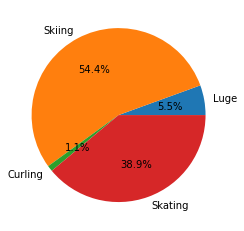

In [12]:
x1=countOf(df.Sport,"Luge")
x2=countOf(df.Sport,"Skiing")
x3=countOf(df.Sport,"Curling")
x4=countOf(df.Sport,"Skating")
plt.pie([x1,x2,x3,x4], labels=["Luge","Skiing","Curling","Skating"], autopct="%1.1f%%")
plt.show()

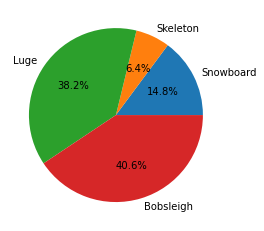

In [13]:
x1=countOf(df.Discipline,"Snowboard")
x2=countOf(df.Discipline,"Skeleton")
x3=countOf(df.Discipline,"Luge")
x4=countOf(df.Discipline,"Bobsleigh")
plt.pie([x1,x2,x3,x4], labels=["Snowboard","Skeleton","Luge","Bobsleigh"], autopct="%1.1f%%")
plt.show()

## Gráfico de líneas

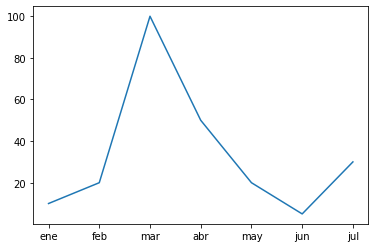

In [45]:
x = ["ene","feb","mar","abr","may","jun","jul"]
y = [10,20,100,50,20,5,30]

plt.plot(x,y)

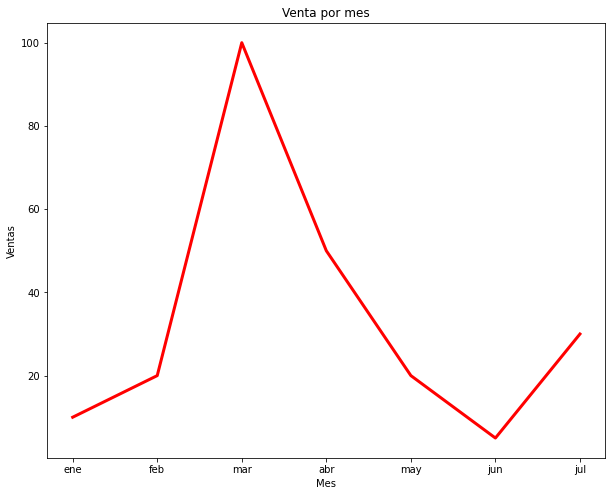

In [46]:
plt.figure(figsize=(10,8))
plt.plot(x,y, color="red", linewidth = 3)
plt.title("Venta por mes")
plt.ylabel("Ventas")
plt.xlabel("Mes")
plt.show()